In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2,
                           metric='minkowski')

In [4]:
# training and testing
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X=iris.data[:, [2,3]]
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [9]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
from matplotlib.colors import ListedColormap
def plot_decision_region(X, y, classifier, test_idx = None, resolution = 0.02):
    # setup marker generator and color map
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    markers = ('s', 'x', 'o', '^', 'v')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[ y == cl, 0],
                    y = X[ y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')
        
    #highlight test samples
    if test_idx:
        #plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c = '', edgecolor = 'black', alpha = 1.0,
                    linewidth=1, marker ='o', s=100, label = 'test set')

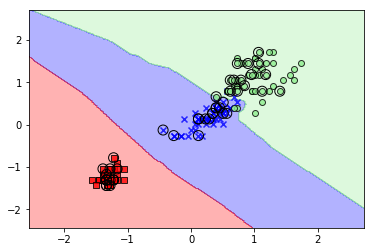

In [15]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))

plot_decision_region(X_combined_std, y_combined_std, classifier=knn, test_idx=range(105,150))
plt.show()